In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Load data

In [2]:
path_base = '../../data/dextramer/external'
path_results = '../../results/dextramer/CD8/revision2'
path_figs = '../../figures/dextramer/revision_plan/'

In [3]:
base_epitope = 'LTDEMIAQY'
df_cov = pd.read_excel(f'{path_base}/Cummulative protection_A01-LTD repertoire.xlsx', skiprows=1)
df_cov = df_cov.set_index('Unnamed: 1')
df_cov = df_cov.drop(columns=['Unnamed: 0'])
df_cov.index.name = None
df_cov = df_cov.T
threshold_2std = df_cov['wild-type'].values
threshold_2std = np.mean(threshold_2std) - np.std(threshold_2std)*2
#threshold_old = df_cov['wt'].loc[297]
df_cov = df_cov.drop(columns=['wild-type'])
threshold_per = df_cov.values
threshold_per = np.percentile(threshold_per, 70)
df_cov = df_cov >= threshold_2std
df_cov.index = [f'LTD{el}' for el in df_cov.index]
df_cov#.head()

,1,2,3,4,5,6,8,9
LTD99,True,False,True,False,False,True,True,False
LTD201,True,False,True,True,False,True,True,False
LTD225,True,False,False,False,False,False,True,False
LTD297,True,False,False,True,False,False,True,False
LTD646,True,False,False,False,True,False,False,False
LTD718,True,False,False,False,False,False,True,False
LTD772,True,False,False,False,False,True,True,False
LTD832,True,False,False,True,False,False,False,False
LTD5918,True,False,False,False,False,False,True,False
LTD6012,True,False,False,False,True,False,True,False


In [4]:
base_epitope = 'YLQPRTFLL'
df_ylq = pd.read_excel(f'{path_base}/Cumulative protection_A02-YLQ repertoire.xlsx', skiprows=1)
df_ylq = df_ylq.set_index('Unnamed: 1')
df_ylq = df_ylq.drop(columns=['Unnamed: 0'])
df_ylq.index.name = None
df_ylq = df_ylq[:-1]
df_ylq = df_ylq.T
df_ylq = df_ylq[df_ylq.index != 8191]
df_ylq = df_ylq / 100
threshold_2std = df_ylq['wild-type'].values
threshold_2std = np.mean(threshold_2std) - np.std(threshold_2std)*2
print(threshold_2std)
df_ylq = df_ylq.drop(columns=['wild-type'])
threshold_per = df_ylq.values
threshold_per = np.percentile(threshold_per, 25)
print(threshold_per)
df_ylq = df_ylq >= threshold_2std
df_ylq.index = [f'YLQ{el}' for el in df_ylq.index]
df_ylq.head()

0.11476428494983598
0.0021874999999999998


,1,2,3,4,5,6,7,8,9
YLQ52,True,False,True,True,False,False,False,True,True
YLQ323,True,False,False,True,False,True,False,True,True
YLQ691,True,False,False,True,False,False,False,False,True
YLQ6467,True,False,False,True,False,True,False,True,False
YLQ6579,True,False,False,False,False,True,False,True,False


In [5]:
base_epitope = 'NLVPMVATV'
alanine_peptides = [base_epitope[:i] + 'A' + base_epitope[i+1:] for i in range(len(base_epitope))
                  if base_epitope[i] != 'A']
alanine_pos = [f'P{i+1}' for i in range(len(base_epitope))
                  if base_epitope[i] != 'A']
df_cmv = pd.read_excel(f'{path_base}/Affinity_prediction_cmv.xlsx', sheet_name='Mean')
df_pep = pd.read_excel(f'{path_base}/Affinity_prediction_cmv.xlsx', sheet_name='peptides')
map_pep = dict(zip(df_pep['ID'], df_pep['Peptide']))
df_cmv['Peptide_ID'] = df_cmv['Peptide_ID'].map(map_pep)
threshold_2std = df_cmv[df_cmv['Peptide_ID']==base_epitope][[el for el in df_cmv.columns if el != 'Peptide_ID']].values
df_cmv = df_cmv[df_cmv['Peptide_ID'].isin(alanine_peptides)]
df_cmv = df_cmv.set_index('Peptide_ID')
df_cmv.index = alanine_pos
df_cmv = df_cmv.T
df_cmv.index = 'CMV' + df_cmv.index
threshold_2std = np.mean(threshold_2std) - np.std(threshold_2std)*2
print(threshold_2std)
threshold_per = df_cmv.values
threshold_per = np.percentile(threshold_per, 70)
print(threshold_per)
df_cmv = df_cmv >= threshold_2std
#df_cmv = df_cmv.drop(columns=['P2'])
df_cmv.head()

35.78192666233414
41.49574422810937


,P1,P2,P3,P4,P5,P6,P8,P9
CMV1_4,False,False,False,False,False,False,True,False
CMV2_4,True,False,True,True,False,False,True,False
CMV3_4,True,False,False,True,False,False,False,False
CMV4_4,True,False,True,False,False,False,False,False
CMV5_2,True,True,True,True,True,False,False,True


In [6]:
base_epitope = 'SIINFEKL'
alanine_peptides = [base_epitope[:i] + 'A' + base_epitope[i+1:] for i in range(len(base_epitope))
                  if base_epitope[i] != 'A']
alanine_pos = [f'P{i+1}' for i in range(len(base_epitope))
                  if base_epitope[i] != 'A']

dfs = []
for rep in ['educated']:
    df_sin = pd.read_excel(f'{path_base}/Affinity_prediction_{rep}_repertoire.xlsx', 
                           sheet_name='Normalized data', skiprows=1)
    df_sin = df_sin[[col for col in df_sin.columns if df_sin[col].iloc[-1]>46.9]]
    apls = pd.read_excel(f'{path_base}/Affinity_prediction_{rep}_repertoire.xlsx', 
                           sheet_name='Individual APL screening', skiprows=1)['Sequence']
    df_sin['APL'] = apls
    df_sin['APL'] = df_sin['APL'].str.split('-').str[1]
    threshold_2std = df_sin[df_sin['APL']==base_epitope][[el for el in df_sin.columns if el != 'APL']].values
    df_sin = df_sin[df_sin['APL'].isin(alanine_peptides)]
    df_sin = df_sin.set_index('APL')
    df_sin.index = alanine_pos
    threshold_2std = np.mean(threshold_2std) - np.std(threshold_2std)*2
    print(threshold_2std)

    threshold_per = df_sin.values
    threshold_per = np.percentile(threshold_per, 40)
    print(threshold_per)
    df_sin = df_sin >= threshold_2std
    df_sin = df_sin.T
    dfs.append(df_sin)
#df_sin = pd.concat(dfs)
df_sin.head()

65.87528040815776
44.5127075732632


,P1,P2,P3,P4,P5,P6,P7,P8
Ed5,False,True,False,False,True,False,False,False
Ed8,True,True,True,False,True,False,False,True
Ed9,True,True,False,False,True,False,False,True
Ed10,True,True,True,False,True,False,False,True
Ed16-1,False,True,True,False,True,False,True,True


## Full data

In [7]:
base_epitope = 'NLVPMVATV'
df_cmv_full = pd.read_excel(f'{path_base}/Affinity_prediction_cmv.xlsx', sheet_name='Mean')
df_pep = pd.read_excel(f'{path_base}/Affinity_prediction_cmv.xlsx', sheet_name='peptides')
map_pep = dict(zip(df_pep['ID'], df_pep['Peptide']))
df_cmv_full['Peptide_ID'] = df_cmv_full['Peptide_ID'].map(map_pep)
df_cmv_full = df_cmv_full.set_index('Peptide_ID')
df_cmv_full = df_cmv_full.T
df_cmv_full.index = 'CMV' + df_cmv.index

threshold_2std = np.mean(df_cmv_full[base_epitope]) - np.std(df_cmv_full[base_epitope])*2
print(threshold_2std)
df_cmv_full = df_cmv_full >= threshold_2std
df_cmv_full = df_cmv_full.drop(columns=base_epitope)
df_cmv_full.head()

35.78192666233414


Peptide_ID,ALVPMVATV,CLVPMVATV,DLVPMVATV,ELVPMVATV,FLVPMVATV,GLVPMVATV,HLVPMVATV,ILVPMVATV,KLVPMVATV,LLVPMVATV,...,NLVPMVATL,NLVPMVATM,NLVPMVATN,NLVPMVATP,NLVPMVATQ,NLVPMVATR,NLVPMVATS,NLVPMVATT,NLVPMVATW,NLVPMVATY
CMVCMV1_4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CMVCMV2_4,True,True,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
CMVCMV3_4,True,True,False,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
CMVCMV4_4,True,True,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
CMVCMV5_2,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True


In [8]:
dfs = []
for rep in ['educated']:
    df_sin_full = pd.read_excel(f'{path_base}/Affinity_prediction_{rep}_repertoire.xlsx', 
                           sheet_name='Normalized data', skiprows=1)
    df_sin_full = df_sin_full[[col for col in df_sin_full.columns if df_sin_full[col].iloc[-1]>46.9]]
    apls = pd.read_excel(f'{path_base}/Affinity_prediction_{rep}_repertoire.xlsx', 
                           sheet_name='Individual APL screening', skiprows=1)['Sequence']
    df_sin_full['APL'] = apls
    df_sin_full['APL'] = df_sin_full['APL'].str.split('-').str[1]
    df_sin_full = df_sin_full.set_index('APL')
    #df_sin_full = df_sin_full >= 46.9
    df_sin_full = df_sin_full.T
    dfs.append(df_sin_full)
df_sin_full = pd.concat(dfs)
threshold_2std = np.mean(df_sin_full['SIINFEKL']) - np.std(df_sin_full['SIINFEKL'])*2
df_sin_full = df_sin_full >= threshold_2std
df_sin_full = df_sin_full.drop(columns='SIINFEKL')
print(threshold_2std)
df_sin_full.head()

65.87528040815776


APL,AIINFEKL,CIINFEKL,DIINFEKL,EIINFEKL,FIINFEKL,GIINFEKL,HIINFEKL,IIINFEKL,KIINFEKL,LIINFEKL,...,SIINFEKM,SIINFEKN,SIINFEKP,SIINFEKQ,SIINFEKR,SIINFEKS,SIINFEKT,SIINFEKV,SIINFEKW,SIINFEKY
Ed5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
Ed8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Ed9,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,True,True,True
Ed10,True,False,True,True,False,True,True,False,True,True,...,False,True,True,True,True,False,False,False,False,True
Ed16-1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True


# Data Visualisation

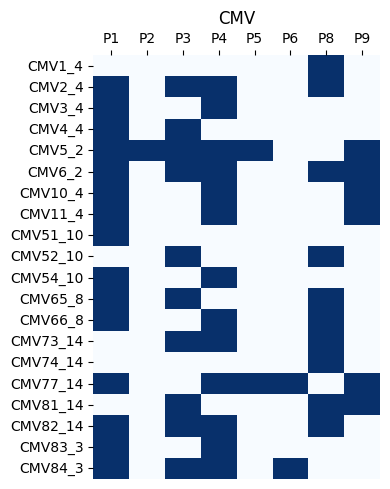

In [9]:
def plot_heatmap(df, title, ax=None):
    plot = sb.heatmap(data=df, cmap='Blues', cbar=False, 
                      ax=ax, )    
    plot.xaxis.tick_top()
    plot.set_title(title)
    
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
plot_heatmap(df_cmv, 'CMV', ax)

plt.tight_layout()
plt.savefig(f'{path_figs}/heatmap_cmv.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/heatmap_cmv.png', bbox_inches='tight', dpi=300,)
plt.show()

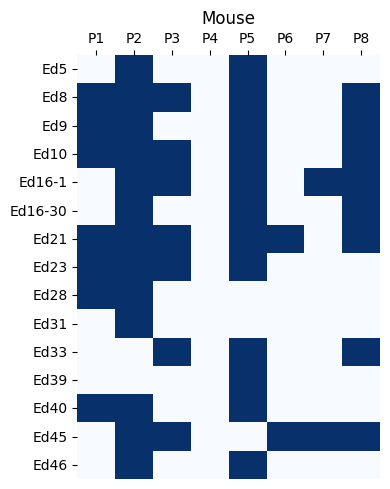

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
plot_heatmap(df_sin, 'Mouse', ax)
plt.tight_layout()
plt.savefig(f'{path_figs}/heatmap_siinfekl.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/heatmap_siinfekl.png', bbox_inches='tight', dpi=300,)
plt.show()

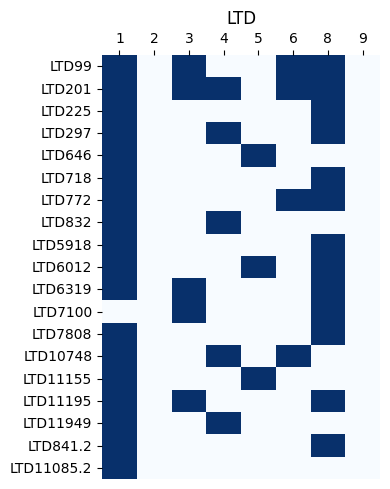

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
plot_heatmap(df_cov, 'LTD', ax)

plt.tight_layout()
plt.savefig(f'{path_figs}/heatmap_ltd.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/heatmap_ltd.png', bbox_inches='tight', dpi=300,)
plt.show()

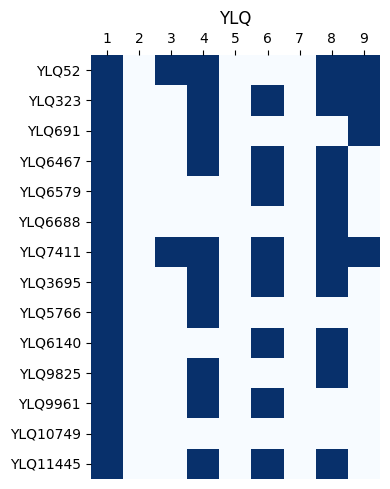

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
plot_heatmap(df_ylq, 'YLQ', ax)

plt.tight_layout()
plt.savefig(f'{path_figs}/heatmap_ylq.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/heatmap_ylq.png', bbox_inches='tight', dpi=300,)
plt.show()

# Protection simulation

In [13]:
from itertools import combinations
from tqdm import tqdm

def plot_protection(df, title, ax=None, normalize='>0', label=None, color=None):
    all_combinations = []
    for group_size in range(1, len(df.index) + 1):
        all_combinations.extend(combinations(df.index, group_size))
    print(f'Length combinations: {len(all_combinations)}')
    lengths = []
    detected = []

    np_values = df.values

    for c in tqdm(all_combinations):
        idx_c = df.index.get_indexer(c)
        detected_epitopes = (np_values[idx_c].sum(axis=0)>0).sum()
        detected.append(detected_epitopes)
        lengths.append(len(c))


    df_simulation = pd.DataFrame(data={
        'combination': all_combinations,
        'length': lengths,
        'N_detect': detected                                    
    })
    if normalize == '>0':
        df_simulation['%_detect'] = df_simulation['N_detect'] / (df.sum(axis=0)>0).sum()
    if normalize == '>=0':
        df_simulation['%_detect'] = df_simulation['N_detect'] / df.shape[1] 
    
    df_simulation[df_simulation['length']==2]['%_detect'].value_counts() 

    if len(df_simulation) == 1:
        plot = sb.scatterplot(data=df_simulation, x='length', y='%_detect' if normalize else 'N_detect',
                              ax=ax, label=label, color=color)
    else:
        plot = sb.lineplot(data=df_simulation, x='length', y='%_detect' if normalize else 'N_detect',
                           errorbar='sd', ax=ax, label=label, color=color)
    sb.despine(ax=plot)
    plot.set_xlabel('Number of clones')
    plot.set_ylabel('% Protection' if normalize else 'N Protection')
    plot.set_xticks(list(range(df_simulation['length'].min(), df_simulation['length'].max()+1, 2)))
    plot.set_title(title)
    plot.set_ylim((0, 1))
    
    percent_max = 0.9 * df_simulation['%_detect'].max()
    plot.axhline(y=percent_max, linestyle='--', color=color)
    return df_simulation

Length combinations: 32767


100%|██████████| 32767/32767 [00:02<00:00, 12183.18it/s]


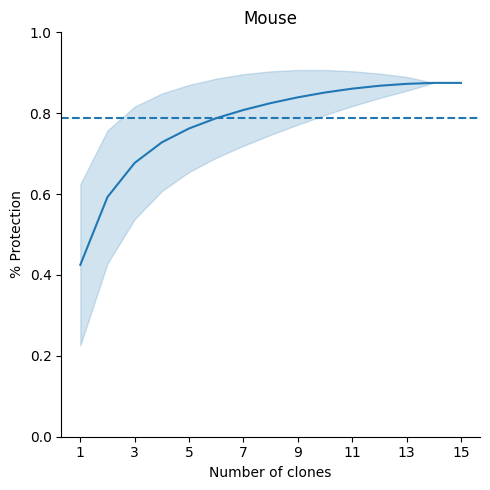

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_simulation_mouse = plot_protection(df_sin, 'Mouse', ax, '>=0')
df_simulation_mouse.groupby('length')['%_detect'].mean()

plt.tight_layout()
plt.savefig(f'{path_figs}/protection_alanine_siinfekl.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_alanine_siinfekl.png', bbox_inches='tight', dpi=300,)
plt.show()

Length combinations: 1048575


100%|██████████| 1048575/1048575 [01:38<00:00, 10669.50it/s]


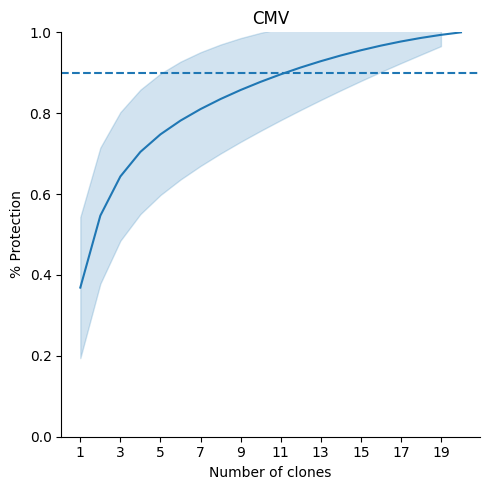

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_simulation_cmv = plot_protection(df_cmv, 'CMV', ax, '>=0')
df_simulation_cmv.groupby('length')['%_detect'].mean()

plt.tight_layout()
plt.savefig(f'{path_figs}/protection_alanine_cmv.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_alanine_cmv.png', bbox_inches='tight', dpi=300,)
plt.show()

Length combinations: 524287


100%|██████████| 524287/524287 [00:46<00:00, 11224.76it/s]


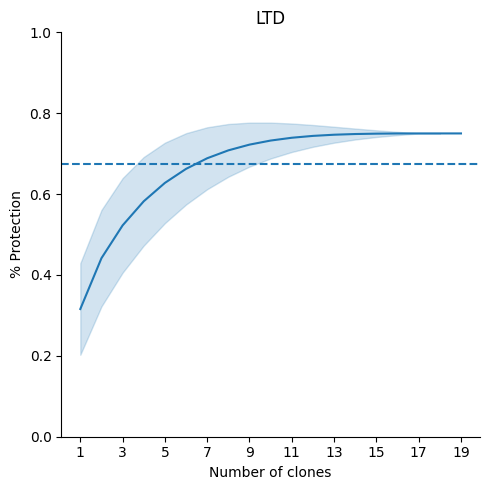

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_simulation_cov = plot_protection(df_cov, 'LTD', ax, '>=0')
df_simulation_cov.groupby('length')['%_detect'].mean()

plt.tight_layout()
plt.savefig(f'{path_figs}/protection_alanine_ltd.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_alanine_ltd.png', bbox_inches='tight', dpi=300,)
plt.show()

In [17]:
df_simulation_cov_ = df_simulation_cov.rename(columns={
    'combination': 'TCRs',
    'length': 'Amount TCRs',
    'N_detect': 'Amount Protection',
    '%_detect': 'Fraction Protection',
})
df_simulation_cov_['TCRs'] = df_simulation_cov_['TCRs'].astype(str).str.replace('(', '').str.replace(',)', '').str.replace("'", '')
df_simulation_cov_['TCRs'] = df_simulation_cov_['TCRs'].str.replace(', ', ';').str.replace(')', '')
df_simulation_cov_.to_csv(f'{path_results}/fig5G.csv')
df_simulation_cov_

,TCRs,Amount TCRs,Amount Protection,Fraction Protection
0,LTD99,1,4,0.500
1,LTD201,1,5,0.625
2,LTD225,1,2,0.250
3,LTD297,1,3,0.375
4,LTD646,1,2,0.250
...,...,...,...,...
524282,LTD99;LTD201;LTD225;LTD646;LTD718;LTD772;LTD83...,18,6,0.750
524283,LTD99;LTD201;LTD297;LTD646;LTD718;LTD772;LTD83...,18,6,0.750
524284,LTD99;LTD225;LTD297;LTD646;LTD718;LTD772;LTD83...,18,6,0.750
524285,LTD201;LTD225;LTD297;LTD646;LTD718;LTD772;LTD8...,18,6,0.750


Length combinations: 16383


100%|██████████| 16383/16383 [00:02<00:00, 8105.69it/s]


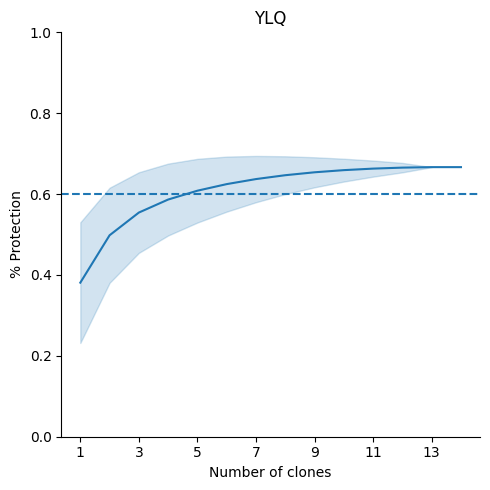

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_simulation_ylq = plot_protection(df_ylq, 'YLQ', ax, '>=0')
df_simulation_ylq.groupby('length')['%_detect'].mean()

plt.tight_layout()
plt.savefig(f'{path_figs}/protection_alanine_ylq.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_alanine_ylq.png', bbox_inches='tight', dpi=300,)
plt.show()

In [19]:
df_simulation_ylq_ = df_simulation_ylq.rename(columns={
    'combination': 'TCRs',
    'length': 'Amount TCRs',
    'N_detect': 'Amount Protection',
    '%_detect': 'Fraction Protection',
})
df_simulation_ylq_['TCRs'] = df_simulation_ylq_['TCRs'].astype(str).str.replace('(', '').str.replace(',)', '').str.replace("'", '')
df_simulation_ylq_['TCRs'] = df_simulation_ylq_['TCRs'].str.replace(', ', ';').str.replace(')', '')
df_simulation_ylq_.to_csv(f'{path_results}/figS17D.csv')
df_simulation_ylq_

,TCRs,Amount TCRs,Amount Protection,Fraction Protection
0,YLQ52,1,5,0.555556
1,YLQ323,1,5,0.555556
2,YLQ691,1,3,0.333333
3,YLQ6467,1,4,0.444444
4,YLQ6579,1,3,0.333333
...,...,...,...,...
16378,YLQ52;YLQ323;YLQ691;YLQ6579;YLQ6688;YLQ7411;YL...,13,6,0.666667
16379,YLQ52;YLQ323;YLQ6467;YLQ6579;YLQ6688;YLQ7411;Y...,13,6,0.666667
16380,YLQ52;YLQ691;YLQ6467;YLQ6579;YLQ6688;YLQ7411;Y...,13,6,0.666667
16381,YLQ323;YLQ691;YLQ6467;YLQ6579;YLQ6688;YLQ7411;...,13,6,0.666667


In [20]:
df_simulation_cov.groupby('length')['%_detect'].mean()/0.75

length
1     0.421053
2     0.588694
3     0.696766
4     0.776316
5     0.836874
6     0.883164
7     0.918172
8     0.944186
9     0.963106
10    0.976522
11    0.985753
12    0.991873
13    0.995743
14    0.998036
15    0.999269
16    0.999828
17    1.000000
18    1.000000
19    1.000000
Name: %_detect, dtype: float64

In [21]:
df_simulation_mouse.groupby('length')['%_detect'].mean()/0.875

length
1     0.485714
2     0.677551
3     0.773940
4     0.832025
5     0.871224
6     0.900243
7     0.923432
8     0.942813
9     0.959184
10    0.972789
11    0.983673
12    0.991837
13    0.997279
14    1.000000
15    1.000000
Name: %_detect, dtype: float64

In [22]:
df_simulation_cmv.groupby('length')['%_detect'].mean()/0.875

length
1     0.421429
2     0.624812
3     0.735589
4     0.805042
5     0.854526
6     0.893373
7     0.925938
8     0.954387
9     0.979859
10    1.002984
11    1.024126
12    1.043506
13    1.061252
14    1.077440
15    1.092105
16    1.105263
17    1.116917
18    1.127068
19    1.135714
20    1.142857
Name: %_detect, dtype: float64

## Per Time-Point evaluation

Length combinations: 1023


100%|██████████| 1023/1023 [00:00<00:00, 10029.48it/s]


Length combinations: 8191


100%|██████████| 8191/8191 [00:00<00:00, 10419.95it/s]


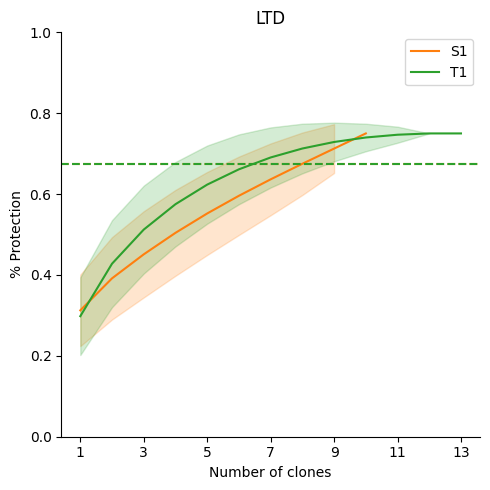

In [23]:
cts_time = {
    'P1': [],
    'S1': ['LTD99', 'LTD225', 'LTD297', 'LTD718', 'LTD5918', 'LTD6012', 'LTD6319', 'LTD7100', 'LTD7808', 'LTD841.2'],
    'T1': ['LTD99', 'LTD225', 'LTD297', 'LTD718', 'LTD832', 'LTD5918', 'LTD6012', 'LTD7100', 'LTD10748', 'LTD11155', 
           'LTD11195', 'LTD11949', 'LTD11085.2'],
}
colors = {
    'P1': 'tab:blue',
    'S1': 'tab:orange',
    'T1': 'tab:green',
}


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for k, v in cts_time.items():
    df_tmp = df_cov[df_cov.index.isin(v)]
    if len(df_tmp)==0:
        continue
    df_tmp = plot_protection(df_tmp, 'LTD', ax=ax, normalize='>=0', label=k, color=colors[k])

plt.tight_layout()
plt.savefig(f'{path_figs}/protection_ltd_by_time.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_ltd_by_time.png', bbox_inches='tight', dpi=300,)
plt.show()  

Length combinations: 1


100%|██████████| 1/1 [00:00<00:00, 1028.52it/s]


Length combinations: 15


100%|██████████| 15/15 [00:00<00:00, 7602.05it/s]


Length combinations: 511


100%|██████████| 511/511 [00:00<00:00, 9832.46it/s]


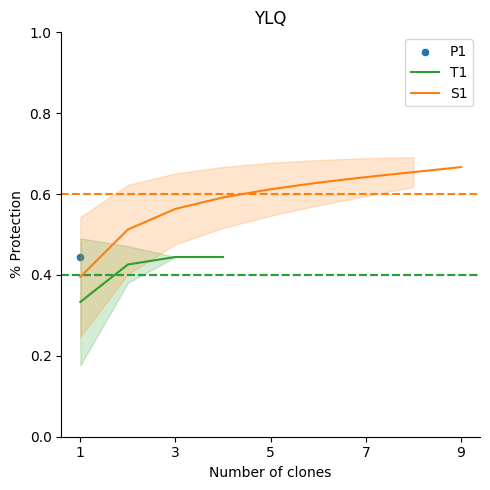

In [24]:
cts_time = {
    'P1': ['YLQ3695'],
    'T1': ['YLQ3695', 'YLQ9961', 'YLQ10749', 'YLQ11445'],
    'S1': ['YLQ323', 'YLQ691', 'YLQ6467', 'YLQ6579', 'YLQ6688', 'YLQ7411', 'YLQ3695', 'YLQ5766', 'YLQ6140'],
}
colors = {
    'P1': 'tab:blue',
    'S1': 'tab:orange',
    'T1': 'tab:green',
}


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for k, v in cts_time.items():
    df_tmp = df_ylq[df_ylq.index.isin(v)]
    df_tmp = plot_protection(df_tmp, 'YLQ', ax=ax, normalize='>=0', label=k, color=colors[k])

plt.tight_layout()
plt.savefig(f'{path_figs}/protection_ylq_by_time.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_ylq_by_time.png', bbox_inches='tight', dpi=300,)
plt.show()

# Full Repertoire Simulation

Length combinations: 1048575


100%|██████████| 1048575/1048575 [01:42<00:00, 10272.60it/s]


Length combinations: 1048575


100%|██████████| 1048575/1048575 [01:52<00:00, 9329.96it/s] 


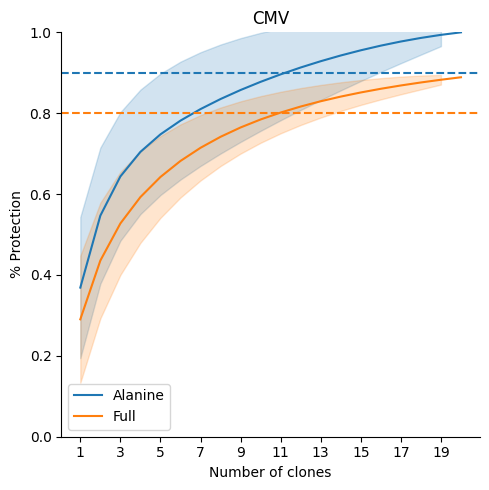

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_sim_cmv_ala = plot_protection(df_cmv, 'CMV', ax=ax, normalize='>=0', label='Alanine')
df_sim_cmv_ful = plot_protection(df_cmv_full, 'CMV', ax=ax, normalize='>=0', label='Full', color='tab:orange')
plt.tight_layout()
plt.savefig(f'{path_figs}/protection_alanine_vs_full_cmv.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_alanine_vs_full_cmv.png', bbox_inches='tight', dpi=300,)
plt.show()

Length combinations: 32767


100%|██████████| 32767/32767 [00:03<00:00, 9488.88it/s] 


Length combinations: 32767


100%|██████████| 32767/32767 [00:03<00:00, 9791.94it/s] 


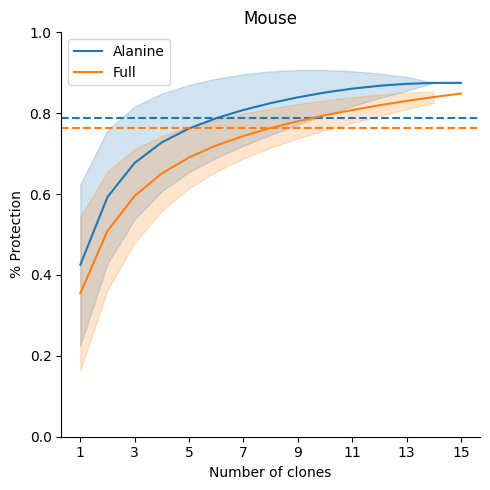

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_sim_sin_ala = plot_protection(df_sin, 'Mouse', ax=ax, normalize='>=0', label='Alanine')
df_sim_sin_ful = plot_protection(df_sin_full, 'Mouse', ax=ax, normalize='>=0', label='Full', color='tab:orange')
plt.tight_layout()
plt.savefig(f'{path_figs}/protection_alanine_vs_full_siinfekl.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/protection_alanine_vs_full_siinfekl.png', bbox_inches='tight', dpi=300,)
plt.show()

In [27]:
df_sim_cmv_ala['Simulation'] = 'NLV - Alanine'
df_sim_cmv_ful['Simulation'] = 'NLV - All Mutations'
df_sim_sin_ala['Simulation'] = 'SIINFEKL - Alanine'
df_sim_sin_ful['Simulation'] = 'SIINFEKL - All Mutations'

df_tmp = pd.concat([df_sim_cmv_ala, df_sim_cmv_ful, df_sim_sin_ala, df_sim_sin_ful])
df_tmp = df_tmp.rename(columns={
    'combination': 'TCRs',
    'length': 'Amount TCRs',
    'N_detect': 'Amount Protection',
    '%_detect': 'Fraction Protection',
})
df_tmp['TCRs'] = df_tmp['TCRs'].astype(str).str.replace('(', '').str.replace(',)', '').str.replace("'", '')
df_tmp['TCRs'] = df_tmp['TCRs'].str.replace(', ', ';').str.replace(')', '')
df_tmp.to_csv(f'{path_results}/figS17F.csv')

In [28]:
from scipy.stats import ttest_ind


def position_wise_stats(df1, df2):
    p_values = []
    lengths = []
    means_ala = []
    means_ful = []
    diffs = []

    for l in df1['length'].unique():
        v_a = df1[df1['length']==l]['%_detect'].values
        v_f = df2[df2['length']==l]['%_detect'].values
        lengths.append(l)
        means_ala.append(v_a.mean())
        means_ful.append(v_f.mean())
        diffs.append(v_f.mean()-v_a.mean())

        _, pval = ttest_ind(v_a, v_f)
        p_values.append(pval)

    df_test = pd.DataFrame({
        'length': lengths,
        'p-value': p_values,
        'mean_alanine': means_ala,
        'mean_full': means_ful,
        'difference': diffs
    })

    def p_val_to_sign(pval):
        if pval < 0.001:
            return '***'
        if pval < 0.01:
            return '**'
        if pval < 0.05:
            return '*'
        return '-'

    df_test['p-value_sign'] = df_test['p-value'].apply(p_val_to_sign)
    return df_test
position_wise_stats(df_sim_sin_ala, df_sim_sin_ful)

C:\Users\felix.drost\Anaconda3\envs\mhcflurry\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\felix.drost\Anaconda3\envs\mhcflurry\lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


,length,p-value,mean_alanine,mean_full,difference,p-value_sign
0,1,3.280500e-01,0.425000,0.354386,-0.070614,-
1,2,1.330754e-04,0.592857,0.509085,-0.083772,***
2,3,5.698961e-21,0.677198,0.595532,-0.081666,***
3,4,4.787051e-73,0.728022,0.651268,-0.076754,***
4,5,5.671502e-182,0.762321,0.690588,-0.071733,***
5,6,0.000000e+00,0.787712,0.720235,-0.067477,***
6,7,0.000000e+00,0.808003,0.743819,-0.064184,***
7,8,0.000000e+00,0.824961,0.763387,-0.061574,***
8,9,0.000000e+00,0.839286,0.780145,-0.059141,***
9,10,0.000000e+00,0.851190,0.794826,-0.056365,***


In [29]:
position_wise_stats(df_sim_cmv_ala, df_sim_cmv_ful)

C:\Users\felix.drost\Anaconda3\envs\mhcflurry\lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


,length,p-value,mean_alanine,mean_full,difference,p-value_sign
0,1,1.431308e-01,0.368750,0.290351,-0.078399,-
1,2,1.756148e-11,0.546711,0.435611,-0.111100,***
2,3,8.062691e-77,0.643640,0.527419,-0.116222,***
3,4,0.000000e+00,0.704412,0.592640,-0.111772,***
4,5,0.000000e+00,0.747710,0.642345,-0.105365,***
5,6,0.000000e+00,0.781701,0.681965,-0.099736,***
6,7,0.000000e+00,0.810196,0.714480,-0.095715,***
7,8,0.000000e+00,0.835089,0.741690,-0.093399,***
8,9,0.000000e+00,0.857377,0.764773,-0.092604,***
9,10,0.000000e+00,0.877611,0.784557,-0.093054,***


In [30]:
from scipy.stats import f
def TwoSampleT2Test(X, Y):
    nx, p = X.shape
    ny, _ = Y.shape
    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    return statistic, p_value

In [31]:
TwoSampleT2Test(df_sim_sin_ala[['length', '%_detect']].values,
                df_sim_sin_ful[['length', '%_detect']].values)

Test statistic: 5994.216908755659
Degrees of freedom: 2 and 65531
p-value: 1.1102230246251565e-16


(5994.216908755659, 1.1102230246251565e-16)

In [32]:
TwoSampleT2Test(df_sim_cmv_ala[['length', '%_detect']].values,
                df_sim_cmv_ful[['length', '%_detect']].values)

Test statistic: 257682.39768870827
Degrees of freedom: 2 and 2097147
p-value: 1.1102230246251565e-16


(257682.39768870827, 1.1102230246251565e-16)

## Eve-Scores

In [33]:
df_eve = pd.read_csv(f'{path_base}/full_spike_evescape.csv')
df_eve.head()

,i,wt,mut,fitness_eve,dissimilarity_charge_hydro,accessibility_wcn,evescape
0,1,M,A,NaN,-2.143469,NaN,-2.437632
1,1,M,C,NaN,-1.756578,NaN,-2.362357
2,1,M,D,NaN,1.435655,NaN,-1.871061
3,1,M,E,NaN,1.251421,NaN,-1.893057
4,1,M,F,NaN,-1.517074,NaN,-2.317395


In [34]:
df_ltd = df_eve[(df_eve['i']>=865) & (df_eve['i']<=873)].copy()
df_ltd['Position'] = df_ltd['i'] - 864
df_ltd_a = df_ltd[df_ltd['mut']=='A'].copy()
df_ltd_a['Position'] = df_ltd_a['i'] - 864
df_ltd_a

,i,wt,mut,fitness_eve,dissimilarity_charge_hydro,accessibility_wcn,evescape,Position
16416,865,L,A,-6.362793,-1.646037,-2.227115,-2.968770,1
16435,866,T,A,-8.654590,-1.369686,-1.943780,-2.912503,2
16454,867,D,A,-5.513013,1.417231,-2.036144,-2.045736,3
16473,868,E,A,-3.786572,1.232997,-1.759029,-1.486407,4
16492,869,M,A,-9.271314,-2.143469,-2.035315,-3.356669,5
16511,870,I,A,-8.553052,-1.277569,-2.252253,-3.388712,6
16549,872,Q,A,5.053564,-0.430093,-1.873692,-1.624438,8
16568,873,Y,A,-10.823755,-1.738154,-2.160829,-3.927703,9


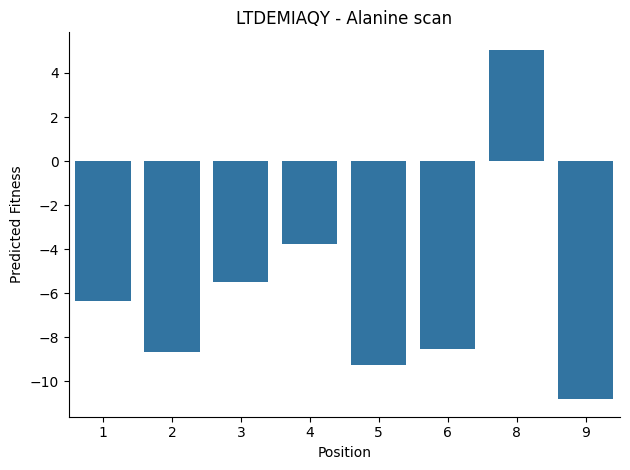

In [35]:
plot = sb.barplot(data=df_ltd_a, x='Position', y='fitness_eve')
sb.despine(ax=plot)
plot.set_title('LTDEMIAQY - Alanine scan')
plot.set_ylabel('Predicted Fitness')

plt.tight_layout()
plt.savefig(f'{path_figs}/eve_fitness_alanine.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/eve_fitness_alanine.png', bbox_inches='tight', dpi=300,)
plt.show()

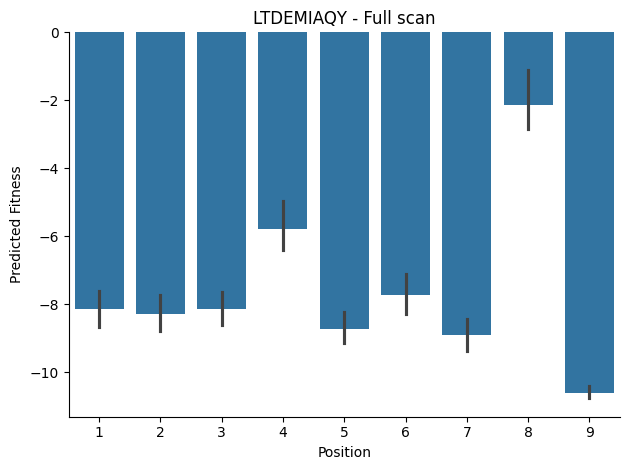

In [36]:
plot = sb.barplot(data=df_ltd, x='Position', y='fitness_eve')
sb.despine(ax=plot)
plot.set_title('LTDEMIAQY - Full scan')
plot.set_ylabel('Predicted Fitness')

plt.tight_layout()
plt.savefig(f'{path_figs}/eve_fitness_full.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/eve_fitness_full.png', bbox_inches='tight', dpi=300,)
plt.show()

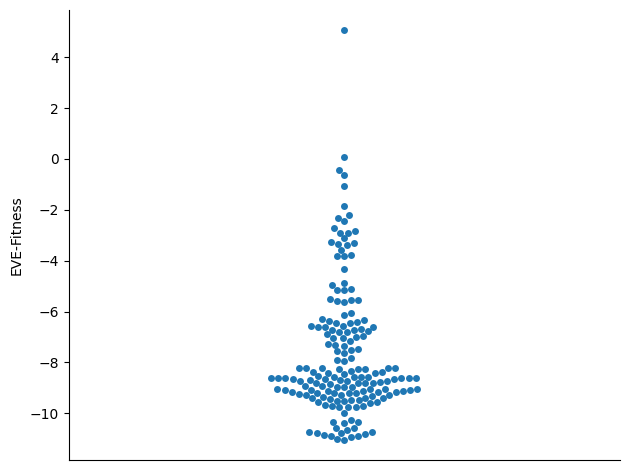

In [37]:
ax = sb.swarmplot(data=df_ltd, y='fitness_eve')
sb.despine(ax=ax)
ax.set_ylabel('EVE-Fitness')
ax.set_xticks([])

plt.tight_layout()
plt.savefig(f'{path_figs}/eve_fitness_ltd_all.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/eve_fitness_ltd_all.png', bbox_inches='tight', dpi=300,)
plt.show()

In [38]:
df_ltd_ = df_ltd.reset_index(drop=True)
rename_dict = {
    'i': 'Position',
    'Position': 'LTD-Position',
    'wt': 'WT-residue',
    'mut': 'Mutation-residue',
    'fitness_eve': 'EVE-Fitness',
    }
df_ltd_ = df_ltd_.rename(columns=rename_dict)
df_ltd_ = df_ltd_[rename_dict.values()]
df_ltd_.to_csv(f'{path_results}/figS17E.csv')

In [39]:
df_ltd[df_ltd['fitness_eve']>=0]

,i,wt,mut,fitness_eve,dissimilarity_charge_hydro,accessibility_wcn,evescape,Position
16549,872,Q,A,5.053564,-0.430093,-1.873692,-1.624438,8
16559,872,Q,M,0.079712,-0.411670,-1.873692,-1.677312,8


In [40]:
df_ltd[df_ltd['fitness_eve']>-5]

,i,wt,mut,fitness_eve,dissimilarity_charge_hydro,accessibility_wcn,evescape,Position
16473,868,E,A,-3.786572,1.232997,-1.759029,-1.486407,4
16475,868,E,D,-0.427563,-1.977658,-1.759029,-1.818926,4
16477,868,E,G,-4.952490,1.067187,-1.759029,-1.624165,4
16483,868,E,N,-4.861206,-0.332992,-1.759029,-1.811975,4
16487,868,E,S,-4.340747,0.293404,-1.759029,-1.661998,4
16527,870,I,V,-3.802319,-1.811848,-2.252253,-2.733466,6
16549,872,Q,A,5.053564,-0.430093,-1.873692,-1.624438,8
16550,872,Q,C,-3.125757,-0.816984,-1.873692,-1.883469,8
16551,872,Q,D,-3.400854,-0.314568,-1.873692,-1.821431,8
16552,872,Q,E,-2.219922,-0.240875,-1.873692,-1.734729,8


# Percentage cross reactivity

In [41]:
def assign_level(score):
    log_score = -1 * np.log10(score)
    if log_score <= 5.5:
        return 'low'
    if log_score <= 6.5:
        return 'low-high'
    if log_score <= 7:
        return 'intermediate-high'
    if log_score > 7:
        return 'high-high'
    return 'idiot'

In [42]:
df_avidity_a04 = [
    [646, 0.000000124],
    [772, 0.0000001347],
    [99, 0.0000001562],
    [201, 0.0000001677],
    [718, 0.0000001723],
    [6012, 0.0000001848],
    [841.2, 0.0000001976],
    [10748, 0.0000002415],
    [11195, 0.0000003633],
    [6319, 0.0000003878],
    [11155, 0.0000004235],
    [5918, 0.0000004403],
    [11949, 0.0000004541],
    [7100, 0.0000004854],
    [7808, 0.0000005036],
    [832, 0.0000005102],
    [225, 0.0000006018],
    [11085.2, 0.0000008714],
    [297, 0.000001532],
]
df_avidity_a04 = pd.DataFrame(df_avidity_a04, columns=['clone_id', 'score_IFNg_EC50']).set_index('clone_id')
df_avidity_a04.index = 'LTD' + df_avidity_a04.index.astype(str).str.replace('.0', '')
df_avidity_a04.index.name = None
df_avidity_a04['-log10_score'] = -1 * np.log10(df_avidity_a04['score_IFNg_EC50'].values)
df_avidity_a04['level_IFNg_EC50'] = df_avidity_a04['score_IFNg_EC50'].apply(assign_level)
df_avidity_a04

,score_IFNg_EC50,-log10_score,level_IFNg_EC50
LTD646,1.240000e-07,6.906578,intermediate-high
LTD772,1.347000e-07,6.870632,intermediate-high
LTD99,1.562000e-07,6.806319,intermediate-high
LTD201,1.677000e-07,6.775467,intermediate-high
LTD718,1.723000e-07,6.763715,intermediate-high
LTD6012,1.848000e-07,6.733298,intermediate-high
LTD841.2,1.976000e-07,6.704213,intermediate-high
LTD10748,2.415000e-07,6.617083,intermediate-high
LTD11195,3.633000e-07,6.439735,low-high
LTD6319,3.878000e-07,6.411392,low-high


In [43]:
df_ltd_frac = pd.DataFrame(df_cov.mean(axis=1))
df_ltd_frac.columns = ['% Protection']
df_ltd_frac['level_IFNg_EC50'] = df_avidity_a04['level_IFNg_EC50']
df_ltd_frac['Epitope'] = 'LTD'
df_ltd_frac

,% Protection,level_IFNg_EC50,Epitope
LTD99,0.500,intermediate-high,LTD
LTD201,0.625,intermediate-high,LTD
LTD225,0.250,low-high,LTD
LTD297,0.375,low-high,LTD
LTD646,0.250,intermediate-high,LTD
LTD718,0.250,intermediate-high,LTD
LTD772,0.375,intermediate-high,LTD
LTD832,0.250,low-high,LTD
LTD5918,0.250,low-high,LTD
LTD6012,0.375,intermediate-high,LTD


In [44]:
df_avidity_a29 = [
    [52, 0.00000002355],
    [5766, 0.00000003258],
    [691, 0.00000003349],
    [6467, 0.00000003569],
    [10749, 0.00000003876],
    [6688, 0.00000004496],
    [6579, 0.00000004571],
    [6140, 0.00000004614],
    [3695, 0.00000004756],
    [9825, 0.00000005136],
    [323, 0.00000003406],
    [11445, 0.00000008472],
    [9961, 0.0000001021],
    [7411, 0.0000001325],
    [8191, 0.00001236],
]
df_avidity_a29 = pd.DataFrame(df_avidity_a29, columns=['clone_id', 'score_IFNg_EC50']).set_index('clone_id')
df_avidity_a29.index = 'YLQ' + df_avidity_a29.index.astype(str).str.replace('.0', '')
df_avidity_a29.index.name = None
df_avidity_a29['-log10_score'] = -1 * np.log10(df_avidity_a29['score_IFNg_EC50'].values)
df_avidity_a29['level_IFNg_EC50'] = df_avidity_a29['score_IFNg_EC50'].apply(assign_level)
df_avidity_a29

,score_IFNg_EC50,-log10_score,level_IFNg_EC50
YLQ52,2.355000e-08,7.628009,high-high
YLQ5766,3.258000e-08,7.487049,high-high
YLQ691,3.349000e-08,7.475085,high-high
YLQ6467,3.569000e-08,7.447453,high-high
YLQ10749,3.876000e-08,7.411616,high-high
YLQ6688,4.496000e-08,7.347174,high-high
YLQ6579,4.571000e-08,7.339989,high-high
YLQ6140,4.614000e-08,7.335922,high-high
YLQ3695,4.756000e-08,7.322758,high-high
YLQ9825,5.136000e-08,7.289375,high-high


In [45]:
df_ylq_frac = pd.DataFrame(df_ylq.mean(axis=1))
df_ylq_frac.columns = ['% Protection']
df_ylq_frac['level_IFNg_EC50'] = df_avidity_a29['level_IFNg_EC50']
df_ylq_frac['Epitope'] = 'YLQ'
df_ylq_frac

,% Protection,level_IFNg_EC50,Epitope
YLQ52,0.555556,high-high,YLQ
YLQ323,0.555556,high-high,YLQ
YLQ691,0.333333,high-high,YLQ
YLQ6467,0.444444,high-high,YLQ
YLQ6579,0.333333,high-high,YLQ
YLQ6688,0.222222,high-high,YLQ
YLQ7411,0.666667,intermediate-high,YLQ
YLQ3695,0.444444,high-high,YLQ
YLQ5766,0.222222,high-high,YLQ
YLQ6140,0.333333,high-high,YLQ


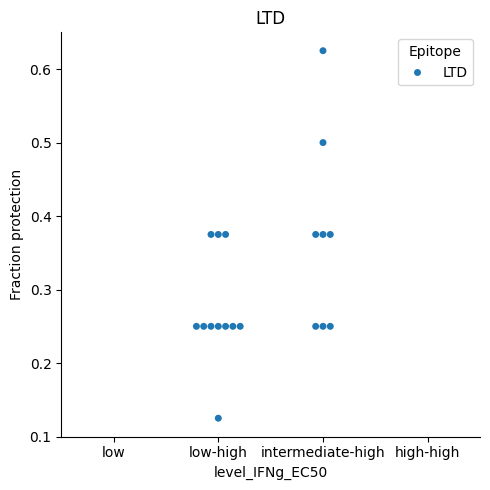

In [46]:
def level_scatterplot(df, title, ax=None):
    order = ['low', 'low-high', 'intermediate-high', 'high-high']
    plot = sb.swarmplot(data=df, x='level_IFNg_EC50', y='% Protection', order=order, hue='Epitope', ax=ax)

    plot.set_title(title)
    sb.despine(ax=plot)
    ax.set_ylabel('Fraction protection')


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
level_scatterplot(df_ltd_frac, 'LTD', ax=ax)

plt.tight_layout()
plt.savefig(f'{path_figs}/frac_protection_by_level_ltd.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/frac_protection_by_level_ltd.png', bbox_inches='tight', dpi=300,)
plt.show()

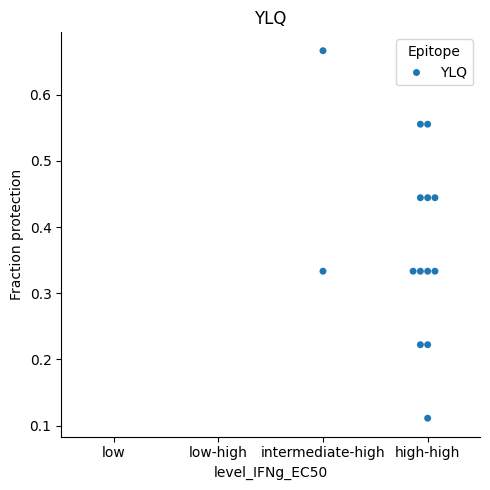

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
level_scatterplot(df_ylq_frac, 'YLQ', ax=ax)

plt.tight_layout()
plt.savefig(f'{path_figs}/frac_protection_by_level_ylq.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/frac_protection_by_level_ylq.png', bbox_inches='tight', dpi=300,)
plt.show()

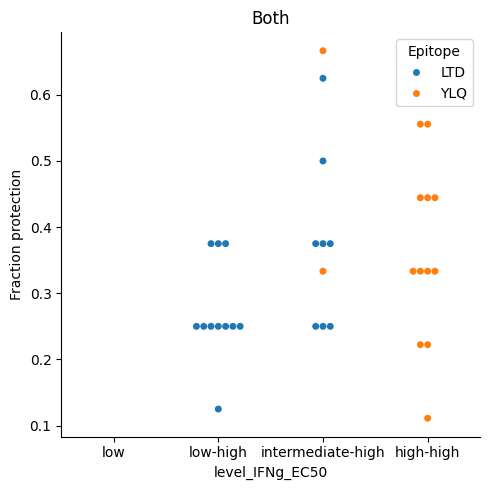

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_joint = pd.concat([df_ltd_frac, df_ylq_frac])
level_scatterplot(df_joint, 'Both', ax=ax)

plt.tight_layout()
plt.savefig(f'{path_figs}/frac_protection_by_level.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/frac_protection_by_level.png', bbox_inches='tight', dpi=300,)
plt.show()

In [49]:
from scipy import stats
x = df_ylq_frac[df_ylq_frac['level_IFNg_EC50']=='high-high']['% Protection'].values
y = df_ylq_frac[df_ylq_frac['level_IFNg_EC50']!='high-high']['% Protection'].values
stats.ttest_ind(x, y)

TtestResult(statistic=-1.2446097204675328, pvalue=0.23703503221920585, df=12.0)

In [50]:
x = df_ltd_frac[df_ltd_frac['level_IFNg_EC50']=='low-high']['% Protection'].values
y = df_ltd_frac[df_ltd_frac['level_IFNg_EC50']!='low-high']['% Protection'].values
stats.ttest_ind(x, y)

TtestResult(statistic=-2.1282869315855644, pvalue=0.048238364827319045, df=17.0)

In [51]:
x = df_joint[df_joint['level_IFNg_EC50']=='low-high']['% Protection'].values
y = df_joint[df_joint['level_IFNg_EC50']=='intermediate-high']['% Protection'].values
stats.ttest_ind(x, y)

TtestResult(statistic=-2.4787838925853385, pvalue=0.022733430506420238, df=19.0)

In [52]:
x = df_joint[df_joint['level_IFNg_EC50']=='high-high']['% Protection'].values
y = df_joint[df_joint['level_IFNg_EC50']=='intermediate-high']['% Protection'].values
stats.ttest_ind(x, y)

TtestResult(statistic=-0.6373300205746821, pvalue=0.5311387885181357, df=20.0)

In [53]:
x = df_joint[df_joint['level_IFNg_EC50']=='low-high']['% Protection'].values
y = df_joint[df_joint['level_IFNg_EC50']=='high-high']['% Protection'].values
stats.ttest_ind(x, y)

TtestResult(statistic=-1.9123675449090511, pvalue=0.0695668389306542, df=21.0)